[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Examples 10.2, 10.4, 10.6, 10.11, 10.17 and 10.24, and Figures 10.3 and 10.6

Analysis of Giannis Antetokounmpo's free throw shooting during the 2021 NBA finals, when opposing crowds would count down loudly to throw him off\
Topics: Null hypothesis, test statistic, p value, two-sample test, z test, one-tailed test, two-tailed test, parametric testing, power function, permutation test, nonparametric testing

Author: Carlos Fernandez-Granda

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
matplotlib.rcParams['text.usetex'] = True
from scipy.stats import norm
import random

from numpy.random import default_rng
rng = default_rng(2021)

font_size = 15
font_size_legend = 15
font_size_ticks = 15

n_home = 44 # Free throws attempted at home
n_away = 41 # Free throws attempted away

made_home = 34 # Free throws made at home
made_away = 22 # Free throws made away

percentage_home = made_home/n_home
percentage_away = made_away/n_away

theta_null = (made_home+made_away)/ (n_home+n_away)

var_null = theta_null * (1-theta_null) * (1./n_home + 1./n_away)
std_null = np.sqrt(var_null)

statistic = (percentage_home - percentage_away)

print("Free-throw percentage at home",round(percentage_home*100,1))
print("Free-throw percentage away",round(percentage_away*100,1))
p_value = 1-norm.cdf(statistic/std_null)
print("p value",round(p_value,3))

Free-throw percentage at home 77.3
Free-throw percentage away 53.7
p value 0.011


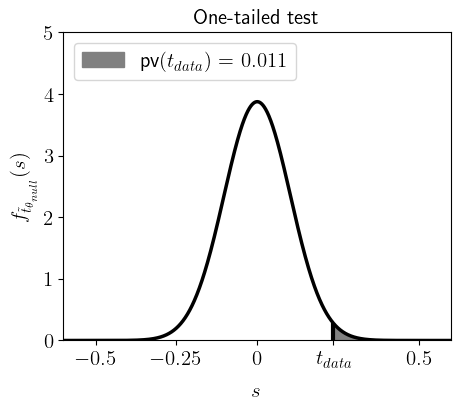

In [2]:
y_max = 5
x_min= -0.6
x_max = 0.6

h = np.arange(x_min,x_max,0.001)
h_statistic = np.arange(statistic,x_max,0.001)
plt.figure(figsize=(5,4))
plt.xticks([-0.5,-0.25,0,statistic,0.5],[r"$-0.5$",r"$-0.25$",r"$0$","$t_{data}$",r"$0.5$"],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylabel(r"$f_{\tilde{t}_{\theta_{null}}}(s)$",fontsize=font_size,labelpad = 5)
plt.xlabel(r'$s$',labelpad = 10,fontsize=font_size)
plt.plot(h,norm.pdf(h,0,std_null),lw=2.5,color="black")
plt.vlines(statistic,-0.01,norm.pdf(statistic,0,std_null),lw=3,color="black")
plt.fill_between(h_statistic, norm.pdf(h_statistic,0,std_null), color='gray', alpha=1,label=r"pv$(t_{data})$ = $0.011$")
plt.ylim([0,y_max])
plt.xlim([x_min,x_max])
plt.legend(fontsize=font_size_ticks,loc="upper left")
plt.title("One-tailed test",fontsize=font_size);

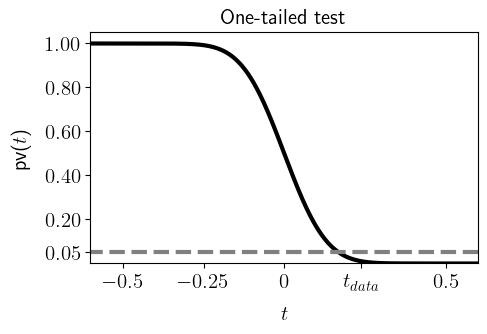

In [3]:
h = np.arange(x_min,x_max,0.001)

plt.figure(figsize=(5,3))
plt.plot(h,1-norm.cdf(h/std_null),lw=3,color="black")
plt.hlines(0.05,-1,x_max+1,lw=3,ls="dashed",label="Significance threshold",color="gray")
plt.xlim([x_min,x_max])
plt.ylim([0,1.05])
plt.xticks([-0.5,-0.25,0,statistic,0.5],[r"$-0.5$",r"$-0.25$",r"$0$","$t_{data}$",r"$0.5$"],fontsize=font_size_ticks) 
plt.yticks([0.05,0.2,0.4,0.6,0.8,1],fontsize=font_size_ticks)
plt.ylabel(r"pv($t$)",fontsize=font_size,labelpad = 10)
plt.xlabel(r'$t$',labelpad =10,fontsize=font_size)
plt.title("One-tailed test",fontsize=font_size);

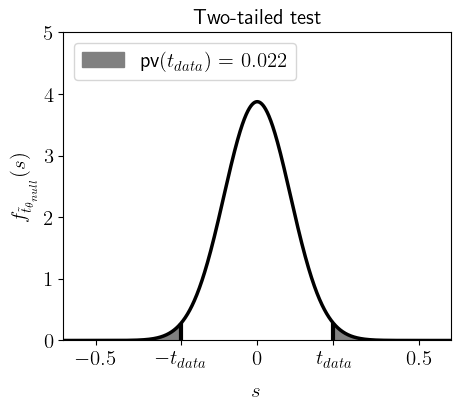

In [6]:
x_min= -0.6
x_max = 0.6

h = np.arange(x_min,x_max,0.001)
h_statistic_minus = np.arange(x_min,-statistic,0.001)
h_statistic_plus = np.arange(statistic,x_max,0.001)
plt.figure(figsize=(5,4))
plt.xticks([-0.5,-statistic,0,statistic,0.5],[r"$-0.5$",r"$-t_{data}$",r"$0$","$t_{data}$",r"$0.5$"],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylabel(r"$f_{\tilde{t}_{\theta_{null}}}(s)$",fontsize=font_size,labelpad = 5)
plt.xlabel(r'$s$',labelpad = 10,fontsize=font_size)
plt.plot(h,norm.pdf(h,0,std_null),lw=2.5,color="black")
plt.vlines(statistic,-0.01,norm.pdf(statistic,0,std_null),lw=3,color="black")
plt.vlines(-statistic,-0.01,norm.pdf(-statistic,0,std_null),lw=3,color="black")
plt.fill_between(h_statistic_minus, norm.pdf(h_statistic_minus,0,std_null), color='gray', alpha=1,label=r"pv$(t_{data})$ = $0.022$")
plt.fill_between(h_statistic_plus, norm.pdf(h_statistic_plus,0,std_null), color='gray', alpha=1)
plt.ylim([0,y_max])
plt.xlim([x_min,x_max])
plt.legend(fontsize=font_size_ticks,loc="upper left")
plt.title("Two-tailed test",fontsize=font_size);

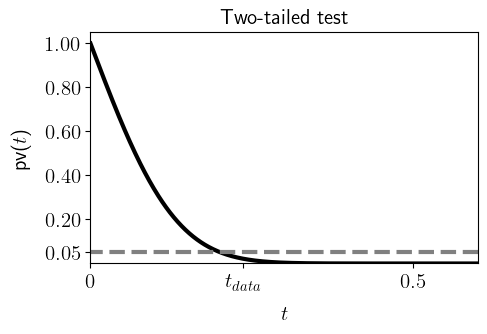

In [8]:
h = np.arange(0,x_max,0.001)

plt.figure(figsize=(5,3))
plt.plot(h,2*(1-norm.cdf(h/std_null)),lw=3,color="black")
plt.hlines(0.05,-1,x_max+1,lw=3,ls="dashed",label="Significance threshold",color="gray")
plt.xlim([0,x_max])
plt.ylim([0,1.05])
plt.xticks([0,statistic,0.5],[r"$0$","$t_{data}$",r"$0.5$"],fontsize=font_size_ticks) 
plt.yticks([0.05,0.2,0.4,0.6,0.8,1],fontsize=font_size_ticks)
plt.ylabel(r"pv($t$)",fontsize=font_size,labelpad = 10)
plt.xlabel(r'$t$',labelpad =10,fontsize=font_size)
plt.title("Two-tailed test",fontsize=font_size);

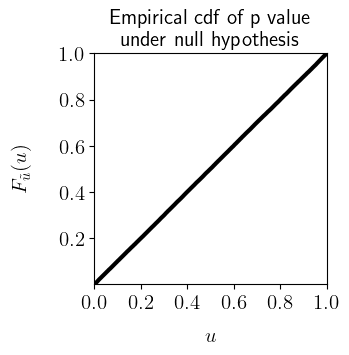

In [9]:
def empirical_cdf(x):
    x_sorted = np.sort(x)
    cdf = np.arange(1, len(x_sorted)+1) / float(len(x_sorted))
    return x_sorted, cdf

m = int(1e5)
rng = default_rng(2022)
simulated_vals = rng.normal(0,std_null,m)
p_values = 1-norm.cdf(simulated_vals/std_null)
sorted_p_values, cdf = empirical_cdf(p_values) 

x_min = 0
x_max = 1
y_min = 0
y_max = 1
plt.figure(figsize=(3,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(np.arange(0.2,1.2,0.2),fontsize=font_size_ticks)
plt.step(sorted_p_values,cdf,linewidth=3,color="black")
#plt.plot([0,1],[0,1],linewidth=2,color="gray",ls="dashed")
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.xlabel(r'$u$',fontsize=font_size,labelpad=10)
plt.ylabel(r'$F_{\tilde{u}}(u)$',fontsize=font_size,labelpad=20)
plt.title("Empirical cdf of p value\n under null hypothesis",fontsize=font_size);

Threshold one side: 0.166
Threshold two sides: 0.198


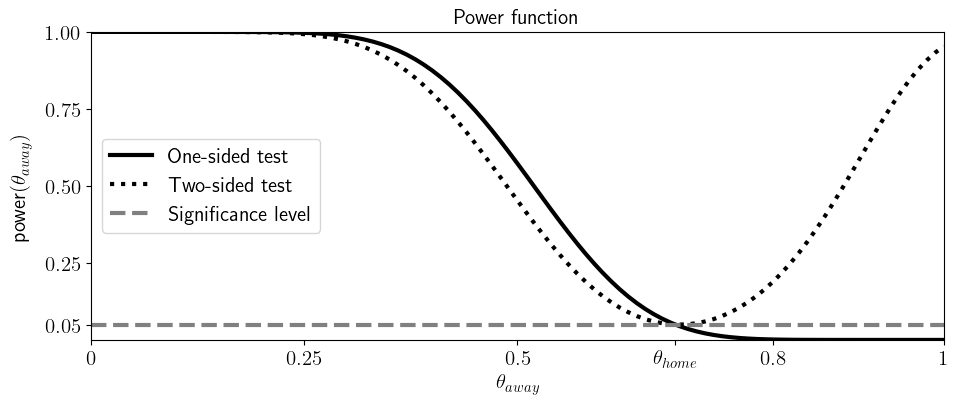

In [10]:
theta_home = 0.685
theta_away = np.arange(0,1+0.01,0.01)
alpha = 0.05

std_null = np.sqrt( theta_home * (1-theta_home) * (1/n_home + 1/n_away) )
tau_alpha_one_side = norm.ppf(1-alpha)*std_null
tau_alpha_two_side = norm.ppf(1-alpha/2)*std_null

print("Threshold one side:",np.round(tau_alpha_one_side,3))
print("Threshold two sides:",np.round(tau_alpha_two_side,3))


mean_theory = theta_home - theta_away
std_theory = np.sqrt(theta_home*(1-theta_home)/n_home + theta_away*(1-theta_away)/n_away)

power_one_side = 1 - norm.cdf((tau_alpha_one_side-mean_theory)/std_theory)
power_two_side = 2 - norm.cdf((tau_alpha_two_side-mean_theory)/std_theory) - norm.cdf((tau_alpha_two_side+mean_theory)/std_theory)

fig = plt.figure(figsize=(11,4))
plt.plot(theta_away,power_one_side,lw=3,ls="solid",color="black",label="One-sided test")
plt.plot(theta_away,power_two_side,lw=3,ls="dotted",color="black",label="Two-sided test")
plt.xticks([0,0.25,0.5,theta_home,0.8,1],[r"$0$",r"$0.25$",r"$0.5$",r"$\theta_{home}$",r"$0.8$",r"$1$"],fontsize=font_size_ticks) 
plt.yticks([0.05,0.25,0.5,0.75,1],fontsize=font_size_ticks)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim([0,1])
plt.ylim([0,1])
plt.hlines(0.05,0,1,lw=3,ls="dashed",color="gray",label = "Significance level")
#plt.vlines(1./6,0,2,lw=2,ls="solid",color="black")
plt.ylabel(r"power$(\theta_{away})$",fontsize=font_size_ticks,labelpad = 10)
plt.xlabel(r'$\theta_{away}$',fontsize=font_size)
plt.legend(fontsize=font_size_legend,loc = "center left")
plt.title("Power function",fontsize=font_size);

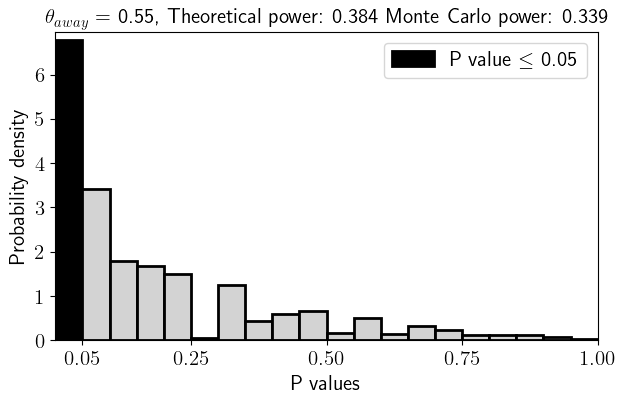

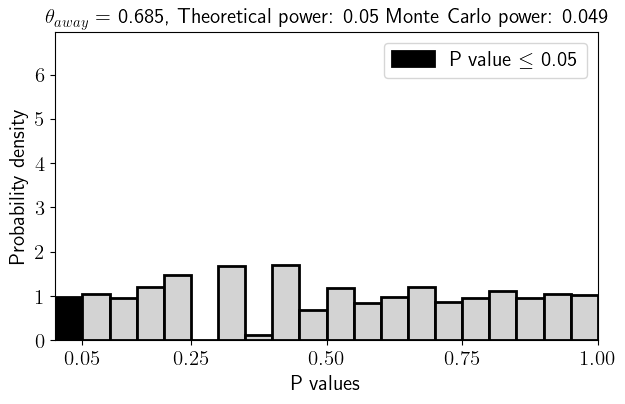

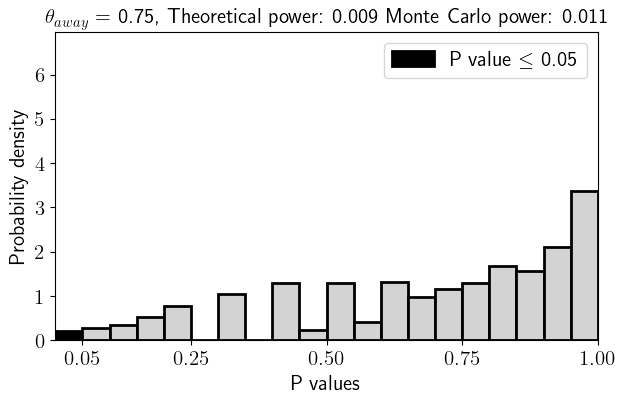

In [11]:
theta_vals = [0.55,theta_home,0.75]

m = int(1e6)
n_bins = 20
ymax = 6.95

for ind,theta_away in enumerate(theta_vals):
    made_home = rng.binomial(n_home,theta_home,m)
    made_away = rng.binomial(n_away,theta_away,m)
    statistic = made_home/n_home - made_away/n_away
    theta_null_estimate = (made_home+made_away)/ (n_home+n_away)
    var_null = theta_null_estimate * (1-theta_null_estimate) * (1./n_home + 1./n_away)
    std_null = np.sqrt(var_null)
    p_values = 1-norm.cdf(statistic/std_null)
    empirical_power = (p_values <= 0.05).sum()/m
    
    mean_theory = theta_home - theta_away
    std_theory = np.sqrt(theta_home*(1-theta_home)/n_home + theta_away*(1-theta_away)/n_away)
    power_one_side = 1 - norm.cdf((tau_alpha_one_side-mean_theory)/std_theory)
    
    plt.figure(figsize=(7,4))
    aux, bins, patches = plt.hist(p_values,bins=n_bins,color='lightgray', edgecolor='black',density="True",linewidth=2,
                                 label=r"P value $\leq$ 0.05")
    patches[0].set_facecolor('black')
    plt.xticks([0.05,0.25,0.5,0.75,1],fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.xlim([0,1])
    plt.ylim([0,ymax])
    plt.ylabel(r"Probability density",fontsize=font_size,labelpad = 5)
    plt.xlabel(r'P values',fontsize=font_size,labelpad = 5)
    plt.legend(fontsize=font_size)
    plt.title(r"$\theta_{away}$ = "+ str(round(theta_away,3)) + ", Theoretical power: " + str(np.round(power_one_side,3)) + " Monte Carlo power: " 
              + str(np.round(empirical_power,3)), fontsize=font_size);

In [12]:
# Permutation test
data = np.zeros(n_home + n_away)
made_home = 34
made_away = 22
data[:(made_home + made_away)] = 1
m = int(1e6) # Number of permutations
test_statistic_samples = np.zeros(m)
for ind in range(m):
    random.shuffle(data)
    test_statistic_samples[ind] = np.mean(data[:n_home])-np.mean(data[n_home:])

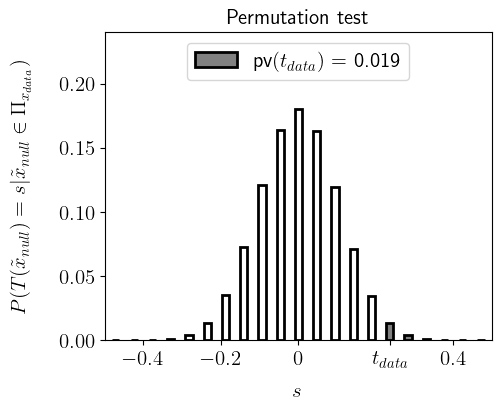

In [13]:
values, counts = np.unique(test_statistic_samples, return_counts=True)
prob = counts/m

xmin = -0.5
xmax = 0.5
ymax = 0.24

observed = percentage_home-percentage_away

plt.figure(figsize=(5,4))
plt.bar(values[values < observed],prob[values < observed], width = 0.0185, color = "white", edgecolor="black",linewidth = 2)
plt.bar(values[values >= observed],prob[values >= observed], width = 0.0185, color = "gray", edgecolor="black",
        linewidth = 2, label = r"pv$(t_{data})$ = " + str(np.round(np.sum(prob[values >= observed]),3)))
plt.xticks([-0.4,-0.2,0,observed,0.4],[r'$-0.4$',r'$-0.2$',r'$0$',r'$t_{data}$',r'$0.4$'],
           fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlim([xmin,xmax])
plt.ylim([0,ymax])
plt.ylabel(r"$P(T(\tilde{x}_{null}) = s| \tilde{x}_{null} \in \Pi_{x_{data}})$",fontsize=font_size,
           labelpad = 20)
plt.xlabel(r'$s$',labelpad = 10,fontsize=font_size)
plt.legend(fontsize=font_size,loc="upper center")
plt.title('Permutation test',fontsize=font_size);

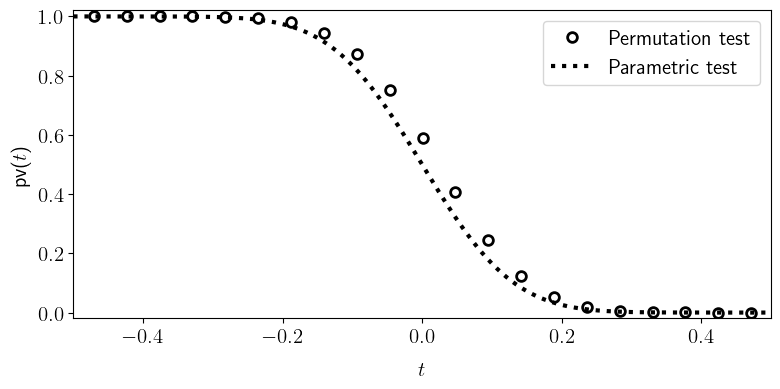

In [14]:
theta_null = (made_home+made_away)/ (n_home+n_away)
var_null = theta_null * (1-theta_null) * (1./n_home + 1./n_away)
std_null = np.sqrt(var_null)

xmin = -0.5
xmax = 0.5
h = np.arange(xmin,xmax,0.001)
cumsum_prob = np.cumsum(prob[::-1])[::-1] 
plt.figure(figsize=(9,4))
plt.plot(values,cumsum_prob, "o",markersize=7,markerfacecolor='white',markeredgecolor="black",
         markeredgewidth=2,label = "Permutation test")
plt.plot(h,1-norm.cdf(h/std_null),lw=3,ls="dotted",color="black",label = "Parametric test")
plt.xticks(fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks)
plt.xlim([xmin,xmax])
plt.ylim([-0.02,1.02])
plt.ylabel(r"pv($t$)",fontsize=font_size,labelpad = 5)
plt.xlabel(r'$t$',labelpad =10,fontsize=font_size)
plt.legend(fontsize=font_size_ticks);